In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

e:\Anaconda\envs\data_analytics_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
top_countries = df['job_country'].value_counts().head(6).index

In [17]:
pivot_table = df.pivot_table(values='salary_year_avg', index='job_country', columns='job_title_short', aggfunc='mean')
pivot_table = pivot_table.loc[top_countries]

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
pivot_table = pivot_table[job_titles]

pivot_table

job_title_short,Data Analyst,Data Engineer,Data Scientist
job_country,,,
United States,94553.964924,134226.676753,139946.707204
India,99149.925532,123312.390533,118203.690217
United Kingdom,89410.916667,115622.200000,110250.933333
France,81575.430000,115738.137097,99103.368421
Germany,101563.062500,130275.897436,117260.243902
Spain,91672.466667,116776.642857,93170.425000


<Axes: xlabel='job_country'>

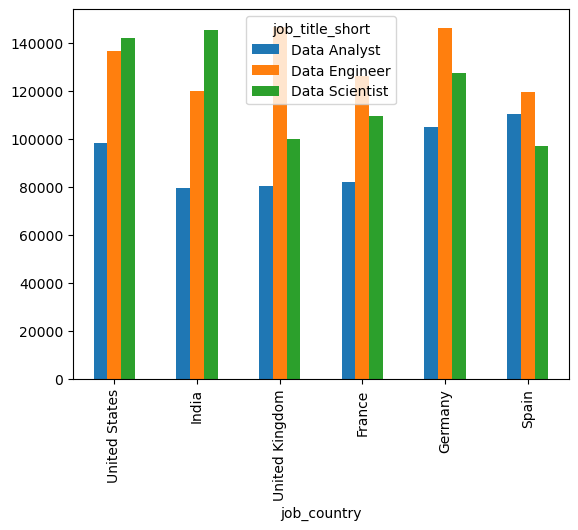

In [14]:
pivot_table.plot(kind='bar')